In [1]:
import torch
import os
import sys
from torchvision.transforms.functional import normalize
from tqdm import tqdm
from IPython.display import clear_output


sys.path.append("/scratch/cv-course2025/group2/uzk_cvproject")
from fly_dataset import FLY_Dataset
from fly_resnet import FLY_Resnet
from fly_evaluate import fly_evaluate_visualize

path_to_data = "/scratch/cv-course2025/group2/data"

In [2]:
train_dataset = FLY_Dataset(path_to_data, mode="training", backbone="resnet")
model = FLY_Resnet(num_joints=38)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
trained_model_1 = FLY_Resnet()
trained_model_1.load_state_dict(torch.load("/scratch/cv-course2025/group2/uzk_cvproject/models/deep-fly-model-resnet50_20250706-051753.pt"))
trained_model_1.to(device)
print("model 1 loaded")
print(trained_model_1.training)

trained_model_2 = FLY_Resnet()
trained_model_2.load_state_dict(torch.load("/scratch/cv-course2025/group2/uzk_cvproject/models/deep-fly-model-resnet50_20250706-175105.pt"))
trained_model_2.to(device)
print("model 2 loaded")

test_dataset = FLY_Dataset(path_to_data, mode="test", backbone="resnet", cam=0)

model 1 loaded
True
model 2 loaded


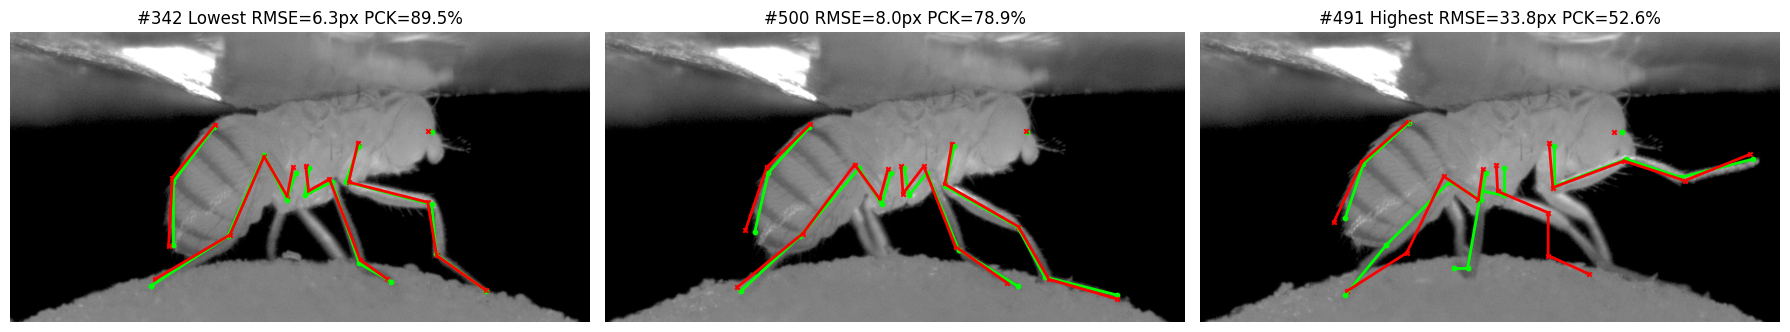

Evaluating:   6%|███                                             | 574/9000 [00:07<01:57, 71.95it/s]


KeyboardInterrupt: 

In [4]:
fly_evaluate_visualize(trained_model_2, test_dataset, device=device, pck_thresh=10)